In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df=pd.read_csv('energy_consumption_levels.csv')

In [30]:
df.isnull().sum()

3_levels         0
5_levels         0
7_levels         0
consumption      0
temperature      0
hour_of_day      0
day_of_week      0
day_of_month     0
month_of_year    0
dtype: int64

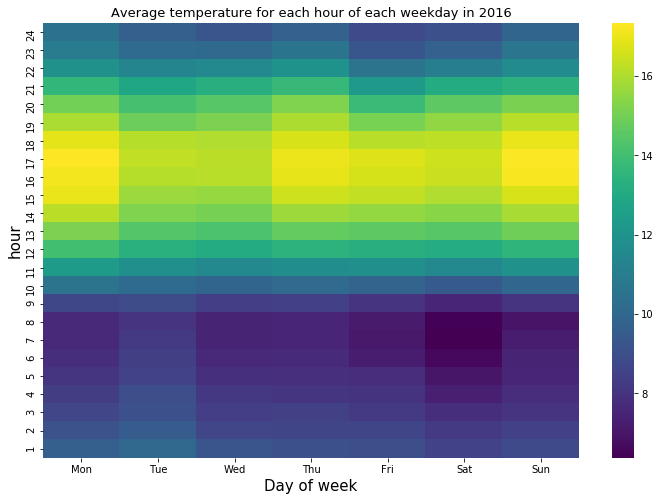

In [31]:
df1 = df.pivot_table(values='temperature', index='hour_of_day', columns = 'day_of_week', aggfunc = 'mean')
fig = plt.figure(figsize=(12, 8))
ax = sns.heatmap(df1.sort_index(ascending = False), cmap='viridis')
fig = ax.set_title("Average temperature for each hour of each weekday in 2016", fontsize = 13)
fig= ax.set_ylabel("hour", fontsize = 15)
fig= ax.set_xlabel("Day of week", fontsize = 15)
fig= ax.set_xticklabels(('Mon','Tue','Wed','Thu','Fri','Sat','Sun'))

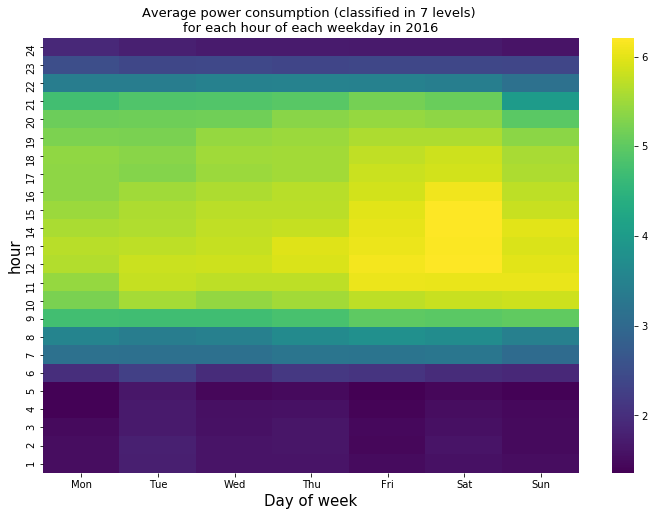

In [42]:
df3 = df.pivot_table(values='7_levels', index='hour_of_day', columns = 'day_of_week', aggfunc = 'mean')
fig = plt.figure(figsize=(12, 8))
ax = sns.heatmap(df3.sort_index(ascending = False), cmap='viridis')
fig = ax.set_title("Average power consumption (classified in 7 levels) \nfor each hour of each weekday in 2016", fontsize = 13)
fig= ax.set_ylabel("hour", fontsize = 15)
fig= ax.set_xlabel("Day of week", fontsize = 15)
fig= ax.set_xticklabels(('Mon','Tue','Wed','Thu','Fri','Sat','Sun'))

In [33]:
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential
import tensorflow as tf

In [34]:
pred_hours=50
test_hours=200

data=df['consumption'][:-test_hours]
real=df['consumption'][-test_hours:].values

In [35]:
scalar=MinMaxScaler(feature_range=(0,1))
scaled_data = scalar.fit_transform(data.values.reshape(-1,1))

In [36]:
x_train=[]
y_train=[]

for i in range(pred_hours, scaled_data.shape[0]):
    x_train.append(scaled_data[i-pred_hours:i,0])
    y_train.append(scaled_data[i,0])

x_train=np.array(x_train)
y_train=np.array(y_train)
x_train= np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [37]:
model=Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [39]:
model.fit(x_train, y_train, verbose=1, epochs=30, batch_size=32)

Epoch 1/30
8534/8534 [==============================] - 14s 2ms/step - loss: 0.0069 - accuracy: 2.3436e-04
Epoch 2/30
8534/8534 [==============================] - 14s 2ms/step - loss: 0.0060 - accuracy: 2.3436e-04
Epoch 3/30
8534/8534 [==============================] - 15s 2ms/step - loss: 0.0054 - accuracy: 2.3436e-04
Epoch 4/30
8534/8534 [==============================] - 15s 2ms/step - loss: 0.0049 - accuracy: 2.3436e-04
Epoch 5/30
8534/8534 [==============================] - 14s 2ms/step - loss: 0.0044 - accuracy: 2.3436e-04
Epoch 6/30
8534/8534 [==============================] - 16s 2ms/step - loss: 0.0039 - accuracy: 2.3436e-04
Epoch 7/30
8534/8534 [==============================] - 15s 2ms/step - loss: 0.0038 - accuracy: 2.3436e-04
Epoch 8/30
8534/8534 [==============================] - 15s 2ms/step - loss: 0.0035 - accuracy: 2.3436e-04
Epoch 9/30
8534/8534 [==============================] - 14s 2ms/step - loss: 0.0032 - accuracy: 2.3436e-04
Epoch 10/30
8534/8534 [==============

In [40]:
model.save('power')

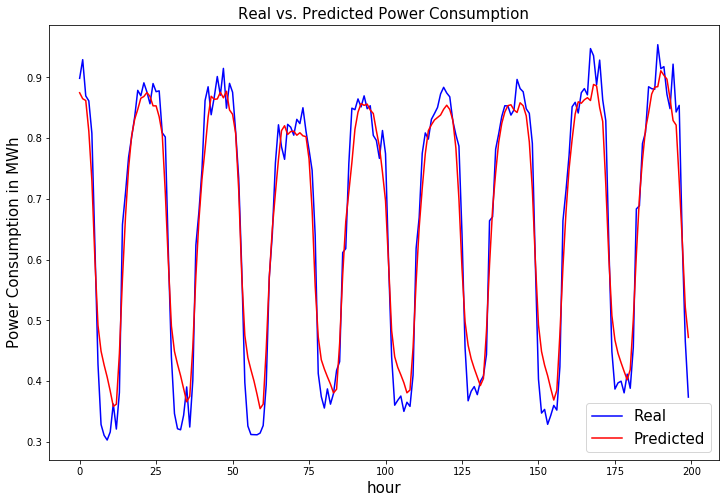

In [41]:
data_all=df['consumption']
data_all= scalar.fit_transform(data_all[-pred_hours-test_hours:].values.reshape(-1,1))

x_test=[]
for i in range(pred_hours, data_all.shape[0]):
    x_test.append(data_all[i-pred_hours:i, 0])

x_test=np.array(x_test)
x_test= np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1)) 

pred= model.predict(x_test)
pred=scalar.inverse_transform(pred)

fig=plt.figure(figsize=(12,8))
plt.plot(real, color='blue')
plt.plot(pred, color='red')
plt.xlabel('hour', fontsize=15)
plt.ylabel('Power Consumption in MWh', fontsize=15)
plt.title('Real vs. Predicted Power Consumption', fontsize=15)
plt.legend(['Real','Predicted'], fontsize=15)

In [ ]:
model.s